This project seeks to determine the best neighborhood in Pittsburgh. We define the "best" neighborhood as the one which is safest to live in. We determine the safety of each neighborhood by the number of fire incidents and police arrests occured there, relative to its population. We find it important to compare the number of dangerous events which have occured in a neighborhood relative to its total area because some neighborhoods may be vastly different sizes. We are not interested purely in the number of dangerous events which have occured in a neighborhood, but in the likelihood of a dangerous event occuring within meaningful proximity to one who lives in said neighborhood. 

Our metric is safety. The best neighborhood is the one which is the safest. In order to measure the safety of a neighborhood, we will be analyzing both the number of fire incidents and police arrests in each neighborhood relative to its population. Our datasets include fire incidents, police arrests, and population by neighborhood.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fires_data = pd.read_csv("FireIncidents.csv", sep=",")
fires = fires_data['neighborhood'].value_counts()

arrests_data = pd.read_csv("arrests.csv", sep=",")
arrests = arrests_data['INCIDENTNEIGHBORHOOD'].value_counts()


Given the number of arrests and number of fires which occured in each neighborhood, we summed these metrics to yield the number of unsafe events which occured in each neighborhood.

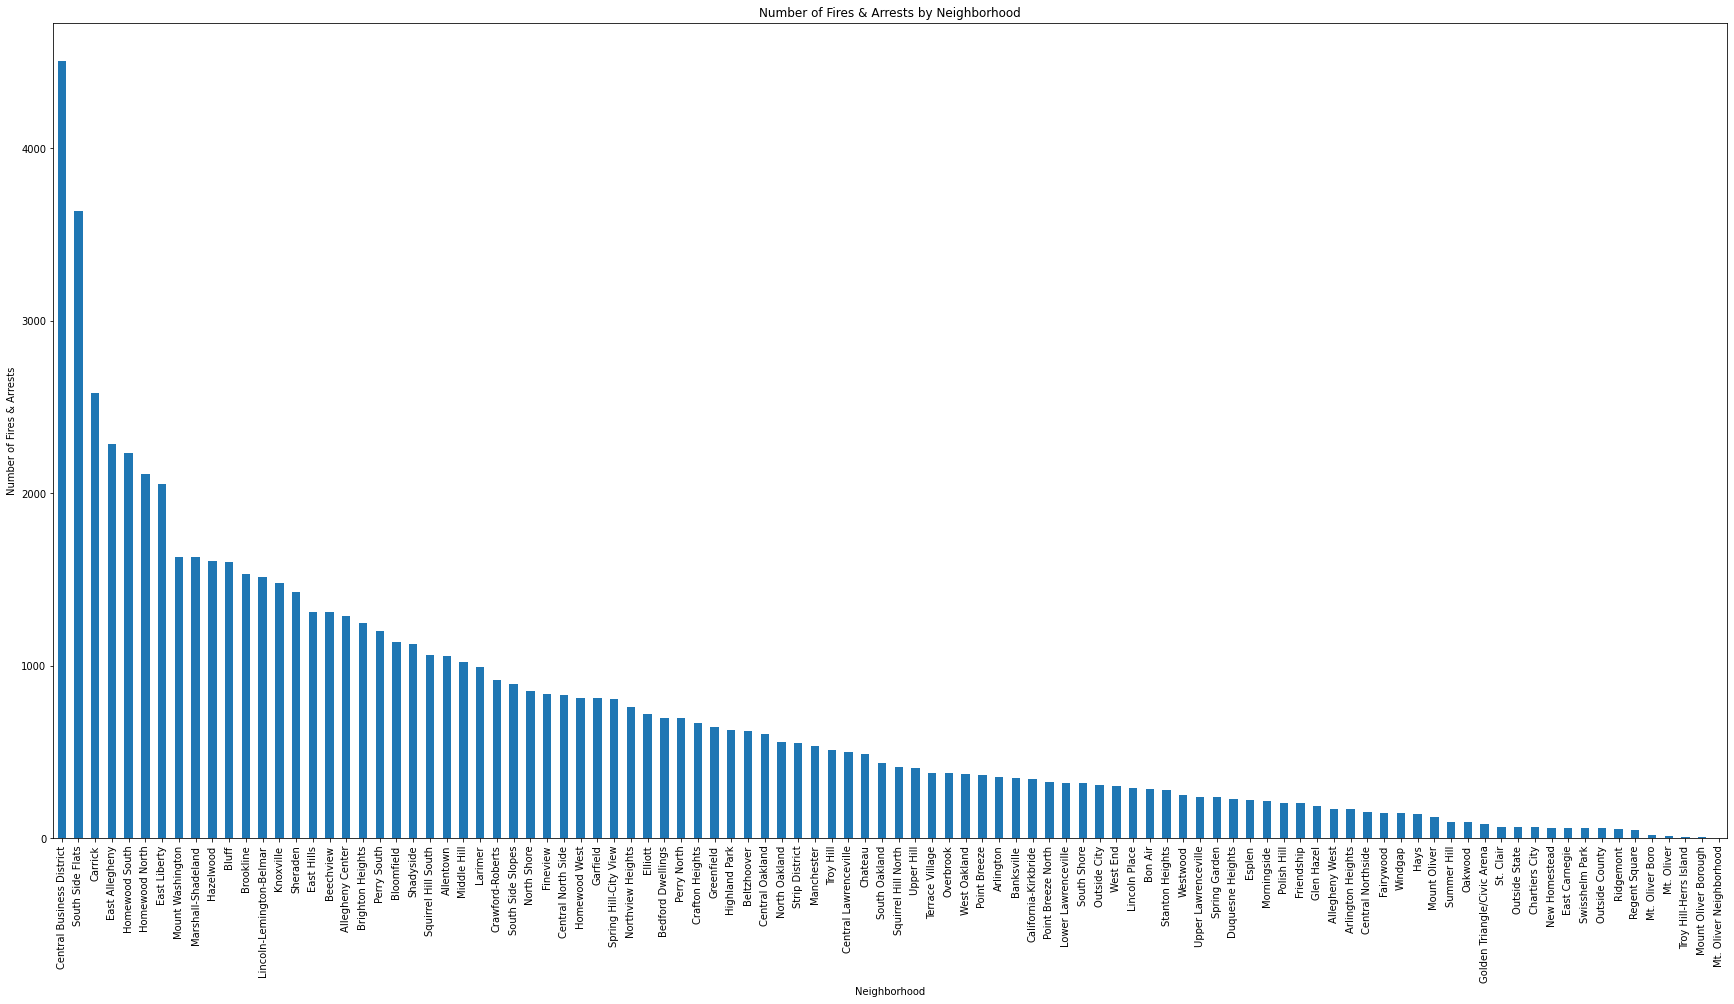

In [2]:
arrests_and_fires = fires.add(arrests, fill_value=0).sort_values(ascending=False)
arrests_and_fires.plot(kind='bar', figsize=(30,15))
plt.title('Number of Fires & Arrests by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fires & Arrests')
plt.show()

We then divided the number of unsafe events in each neighborhood by its area, yeilding a metric which accurately represents the likelihood of an unsafe event occuring within meaningful proximity to one who lives in a neighborhood.

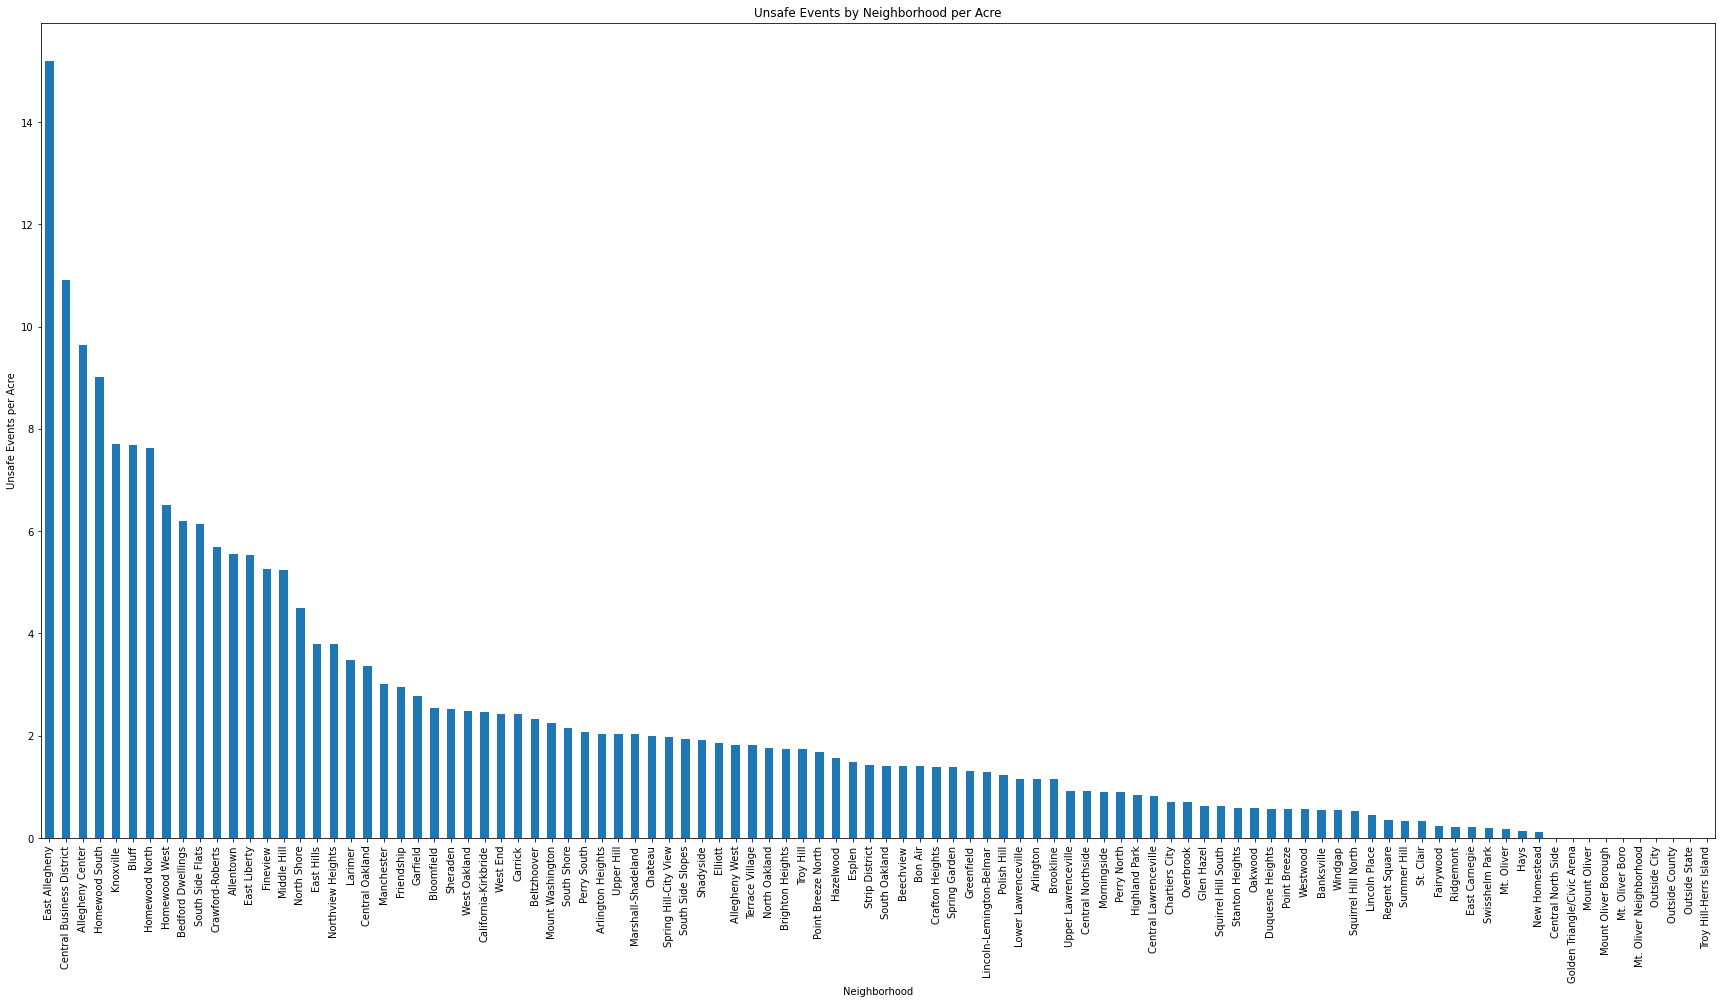

In [6]:
area_data = pd.read_csv("neighborhood_area.csv")
area = area_data.groupby("hood").sum()['acres'].sort_values()
arrests_and_fires_by_area = arrests_and_fires.div(area).sort_values(ascending=False)
arrests_and_fires_by_area.plot(kind='bar', figsize=(30,15))
plt.title('Unsafe Events by Neighborhood per Acre')
plt.xlabel('Neighborhood')
plt.ylabel('Unsafe Events per Acre')
plt.show()

Ignoring the neighborhoods for which we lack data on area, and therefore cannot draw meaningful conclusions, our data shows that the safest, and therefore best neighborhoods to live is New Homestead. New Homestead has had a low number of arrests and fires, but this is not simply because it is relatively small. Incorporating the area of the neighborhood into our analysis ensures that all neighborhoods are evaluated fairly. 

Josh Fratis: I've never been to New Homestead, so I can't speak to my personal experience of its quality or safety. I can reason that the Central Business District, which is shown in our data as second-most unsafe would be relatively unsafe given the busy and crowded nature of downtown. I've also lived in Highland Park, which I found to be quite safe, but not perfectly safe, which matches its place in our data in the bottom third of unsafe events by acre. It is also described by the data as more safe than South Oakland, which I would also perceive as less safe.